<h1 style="text-align:center">Days Sales of Inventory</h1>
<p style="text-align:justify">
Days Sales of Inventory (DSI) is a key performance indicator which could insight about how help free up cash for the bussines if we reduce the number of days that property is in the invetary. If the items are for too long in inventory then causes money loss. 
    </p>
<p style="text-align:justify">
The DSI indicates the average number of days that we store items in inventory based on average inventory balance and cost of sales.
</p>
<p style="text-align:right">
Pover, K. (2016). Mastering QlikView Data Visualization. Reino Unido: Packt Publishing. pp 106
</p>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_dsi(df, event = 1):

    # Calculate daily sales
    avg_daily_sales = df['event'].value_counts()[event] / 365

    # Calculate DSI for each property
    df['dsi'] = df['time2event'] / avg_daily_sales

    return df

def analyze_dsi(file_path):
    # Load CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    df.loc[df['property_type']=='apartment'].reset_index()

    # Filter for sold properties
    sold_properties_df = df.loc[df['event'] == 1]

    # Calculate DSI
    df_with_dsi = calculate_dsi(sold_properties_df)

    # Display DSI for each property
    dsi_stats = df_with_dsi[['event', 'dsi']]

    #print("Average Days Sales of Inventory (DSI) for Each property:")
    #print(dsi_stats)
    # Filter for no-sold properties
    no_sold_properties_df = df.loc[df['event'] == 0]

    # Calculate DSI
    df_with_dsi = calculate_dsi(no_sold_properties_df,event=0)

    # Display DSI for each property
    dsi_stats = df_with_dsi[['event', 'dsi']]

    result_df = pd.concat([sold_properties_df, no_sold_properties_df])

    #print("Average Days Sales of Inventory (DSI) for Each property:")
    #print(dsi_stats)
    # Plot DSI for sells vs no-sells
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='event', y='dsi', data=result_df)
    plt.title('Days Sales of Inventory (DSI) for Sells vs No-Sells')
    plt.xlabel('Sold')
    plt.ylabel('DSI')
    plt.show()
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='dsi', y='last_price', data=sold_properties_df)
    sns.scatterplot(x='dsi', y='last_price', data=no_sold_properties_df)
    plt.title('Days Sales of Inventory (DSI)-last_price for Sells vs No-Sells')
    plt.xlabel('DSI')
    plt.ylabel('last_price')
    plt.show()

C:\Users\mausa\AppData\Local\Temp\ipykernel_62252\3080189779.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dsi'] = df['time2event'] / avg_daily_sales
C:\Users\mausa\AppData\Local\Temp\ipykernel_62252\3080189779.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dsi'] = df['time2event'] / avg_daily_sales


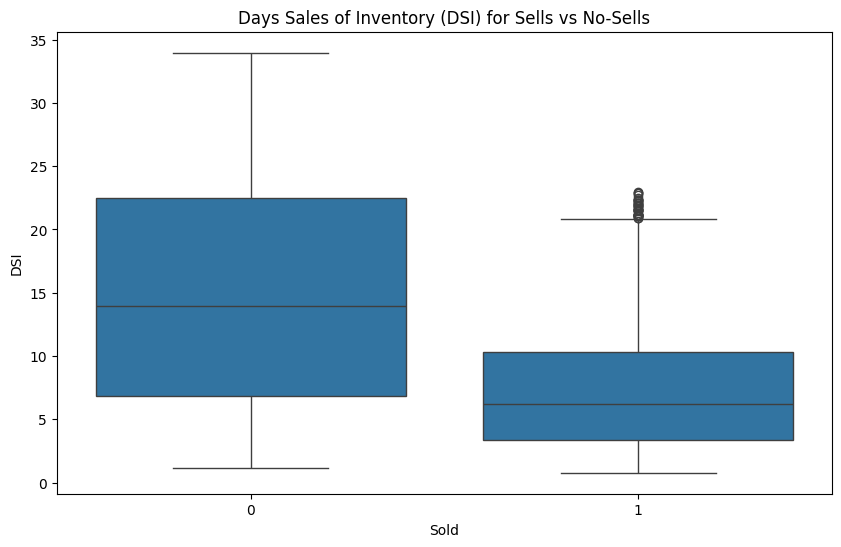

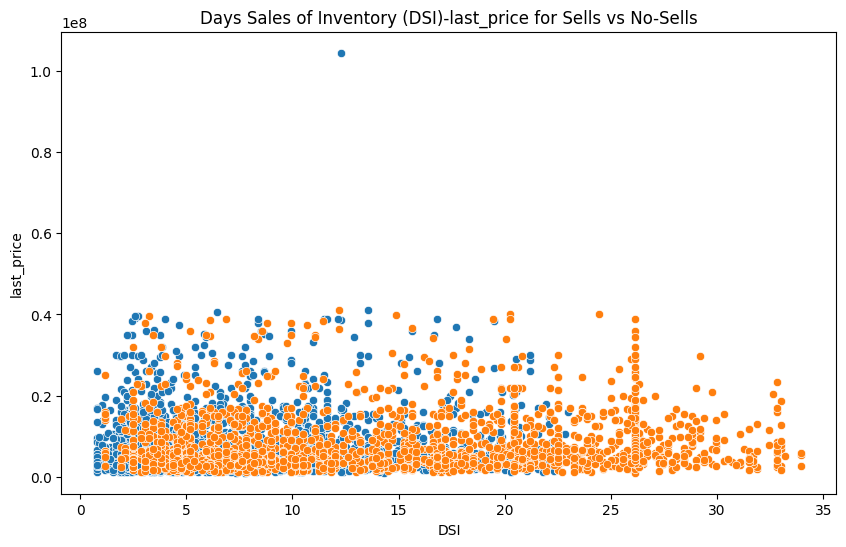

In [27]:

file_path = "liquidity_challenge.csv"
analyze_dsi(file_path)